# Gaussian Process Regression

In previous 2 methods for regression problem, we will define a set of parameters and find the best fit combination. However, in some cases it is difficult to know the relation between dependent variables and independent variables, if use parameter-based regression approach, may can not get a effective prediction model.

By Bayes rule, we can mapping the uncertainty into a prior over maping and get the posterior. Gaussian process can be used to represent a prior distribution and no parameter is needed.  

<img src="img/gaussian_process_example.png" width="600">

#### **Bayesian Inference**
A Bayesian inference is to update a statistical hypothesis unital the new information untial available. The posterior probability $p(X|Y)$ can be derived from prior probability $p(X)$ and ikelihood function $p(Y|X)$ (can be observed from given data $X$ and $Y$) by Bayesian rule,
$$p(X|Y) = {p(Y|X)p(X)} \over {p(Y)} $$

$p(Y)$ is the marginal likelihood, 
$$p(Y) = \int p(Y|X)p(X)dX $$
 
We usually take log marginal likelihood $logp(Y)$ as objective function during the learning.

#### **Gaussian process with Bayesian inference**

Here show a two-dimensional gaussian process example.
<img src="img/gaussian_process_distribution_example.png" width="600">


**Definition**: A Gaussian process is a collection of random variables, any finite number of which have a joint Gaussian distribution, which means each random variable is distributed normally and their joint distribution is also Gaussian.
  
A Gaussian function has 2 components: mean function $\mu(x)$ and covariance function $cov(x,x')$

$$\mu(x) = \Bbb{E}[f(x)]$$
$$cov(x,x') = \Bbb{E}[(f(x)-\mu(x))(f(x')-\mu(x'))]$$

The Gaussian process can be expressed as,
$$f(x)\sim \cal{GP}(\mu(x),cov(x,x'))$$

Gaussian distributions have the nice algebraic property of being closed under conditioning and marginalization. Being closed under conditioning and marginalization means that the resulting distributions from these operations are also Gaussian, which makes many problems in statistics and machine learning tractable.

If X, Y are tehe subest of a Gaussian process, we can notation as,

$$p_{XY} = \left[\begin{array}{ccc}X\\Y \end{array}\right]\sim \cal{N}(\mu, \Sigma)=\cal{N}(
    \left[\begin{array}{ccc}\mu_X\\ \mu_Y \end{array}\right] ,
    \left[\begin{array}{ccc}\Sigma_{XX}\Sigma_{XY}\\ \Sigma_{XY}\Sigma_{YY} \end{array}\right]
)$$

**Marginalization**  
we can dertermine the marginal distributeion of $X$ and $Y$ as,  
$X\sim \cal{N}(\mu_x, \Sigma_{XX})$  
$Y\sim \cal{N}(\mu_y, \Sigma_{YY})$  

**Conditioning**  
Conditioning is used to determine the probability of one variable depending on another variable. Using the same exampel,  
$$X|Y \sim \cal{N} \it(\mu_x+\Sigma_{XY}\Sigma_{YY}^{-1}(Y-\mu_Y), \Sigma_{XX}-\Sigma_{XY}\Sigma_{YY}^{-1}\Sigma_{YX})$$
$$Y|X \sim \cal{N} \it(\mu_y+\Sigma_{YX}\Sigma_{XX}^{-1}(Y-\mu_X), \Sigma_{YY}-\Sigma_{YX}\Sigma_{XX}^{-1}\Sigma_{XY})$$

<img src="img/gaussian_process_feature.png" width="600">

The next problem is now to setup the mean $\mu$ and covariance $\Sigma$? We can define $\mu$ as 0 tto simplify the problem and in Gaussian process covariance matrix is determined by convariance function $k$, called *kernel*. Here is one example of kernel function,  
$$k(X,Y)=\theta_0 \text{exp}(- {{\theta_1} \over 2}||X-Y||^2)+\theta_2+\theta_3X^TY$$
  
<img src="img/gaussian_process_kernel.png" width="600">

Firstly, we write a function to calculate above exampl kernel funtion.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import math

def kernel(x, y, thetas):
    sqdist = np.sum(x**2, 1).reshape(-1, 1) + np.sum(y**2, 1) - 2 * np.dot(x, y.T)
    return thetas[0] * np.exp(-0.5*thetas[1]*sqdist) + thetas[2] + thetas[3]* np.dot(x, y.T)

Manually create dataset.

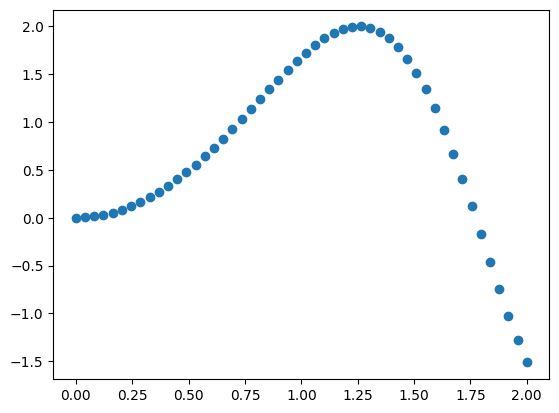

In [105]:
X = np.linspace(0, 2, 50).reshape(-1, 1)
Y = 2*np.sin(X*X)
plt.scatter(X, Y)
plt.show()

In [118]:
from numpy.linalg import inv
thetas = [2, 1, 0, 0]
lr = 0.0001

K = kernel(X, X, thetas) + 1**2 * np.eye(len(X))
sqdist = np.sum(X**2, 1).reshape(-1, 1) + np.sum(X**2, 1) - 2 * np.dot(X, X.T)

epoch = 0
while epoch < 5000:
    update = np.zeros((4))
    d_theta0 = np.exp(-0.5*thetas[1]*sqdist)
    d_theta1 = thetas[0] * np.exp(-0.5*thetas[1]*sqdist) * (-0.5*sqdist)
    d_theta2 = np.ones((len(X),len(X)))
    d_theta3 = X.dot(X.T)
    d_theta = [d_theta0,d_theta1,d_theta2,d_theta3]
    for i in range(4):
        update[i] = -0.5*np.trace(inv(K).dot(d_theta[i])) + 0.5*Y.T.dot(inv(K)).dot(d_theta[i]).dot(inv(K)).dot(Y)
    thetas += lr*update
    K = kernel(X, X, thetas) + 1**2 * np.eye(len(X))
    epoch += 1

print(thetas)

[ 2.24889195  2.02274548 -0.21372792 -0.07229816]


In [119]:
X_s = np.linspace(0, 2, 50).reshape(-1, 1)
K_s = kernel(X, X_s, thetas)
K_ss = kernel(X_s, X_s, thetas)+ np.eye(len(X_s))
K_inv = inv(K)
mu_s = K_s.T.dot(K_inv).dot(Y)
cov_s = K_ss - K_s.T.dot(K_inv).dot(K_s)
cov_s = np.array([cov_s[j][j] for j in range(len(cov_s))])

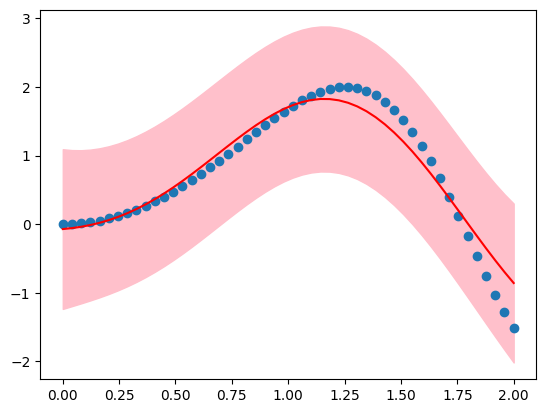

In [123]:
plt.plot(X_s, mu_s, linestyle = '-', color = 'red')
plt.fill_between(X_s.reshape(-1), (mu_s.reshape(-1)-cov_s), (mu_s.reshape(-1)+cov_s), color = 'pink')
plt.scatter(X, Y)
plt.show()

$$K(X,Y)= \sigma^2_f \text{exp}({-{1}\over{2}} ({{X-Y}\over{l}})^2)$$

This is the RBF kernel function, $l$ is a positive constant to control characeristic lengthscale, and $\sigma^2_f$ is to control the variation of function.


In [266]:
from scipy.spatial.distance import cdist
def kernel(x: np.array, y: np.array, var_f: float, l: float) -> np.array:
    """RBF kernel function.
    Args:
        x: numpy array of shape (n, d)
        y: numpy array of shape (m, d)
        var_f: float, variance
        l: float, length scale
    Returns:
        numpy array of shape (n, m)
    """
    sqdist = np.sum(x**2, 1).reshape(-1, 1) + np.sum(y**2, 1) - 2 * np.dot(x, y.T) # (x - y)^2
    return var_f * np.exp(-sqdist / (2*l**2))

Convariance matrix implies the distibution of function, let's manually create sone data to visualize the distribution of function.

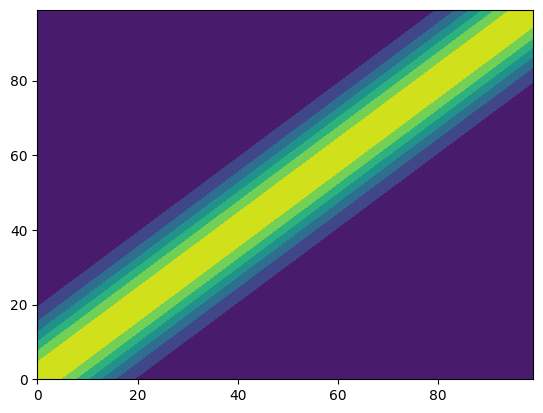

In [267]:
x_s = np.linspace(-5, 5, 100).reshape(-1,1)
cov_s = kernel(x_s, x_s, 1, 1)
plt.contourf(cov_s)

With the convariance matrix, we can generate a random Gaussian vector by, 
$$f_* \sim \cal{N}\it(0,K(x_*,x_*))$$
before this, we need to xpress the multivariate normal distribution into standard normal,
$$f_* \sim \mu + B\cal{N}\it(0,I), \quad where\ BB^T=K(X_*,X_*)$$
$B$ is square root of $K(X_*,X_*)$ and can be obtained by Cholesky Decomposition.

In [268]:
def sample(mu: float, var: np.array, N: int, epsilon: float = 1e-10):
    """Generate N samples from a multivariate Gaussian with mean mu and covariance var.
    Args:
        mu: float, mean
        var: numpy array of shape (n, n), convariace matrix
        N: int, number of samples
        epsilon: float, small number to ensure numerical stability (eigenvalues of K can decay rapidly
    Returns:
        numpy array of shape (n, N)"""
    n = var.shape[0]
    L = np.linalg.cholesky(var + epsilon*np.eye(var.shape[0])) # cholesky decomposition (square root) of covariance matrix
    f_post = mu + L @ np.random.normal(size=(n, N))
    return f_post

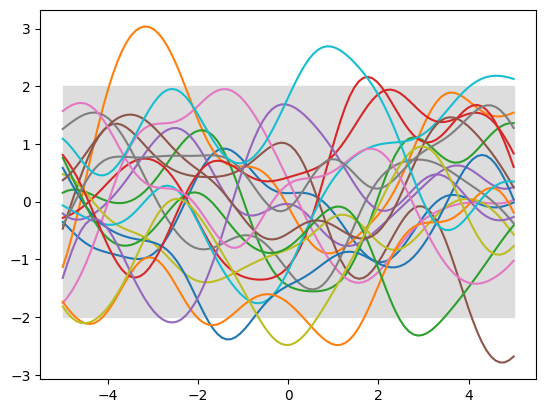

In [269]:
f_prior = sample(0, cov_s, 20)
std = np.sqrt(np.diag(cov_s))
plt.plot(x_s, f_prior)
plt.fill_between(x_s.flatten(), 0-2*std, 0+2*std, color="#dddddd")
plt.show()

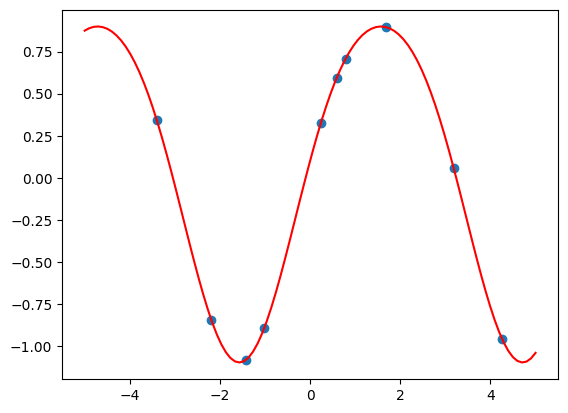

In [295]:
def f(x: np.array) -> np.array:
    return np.sin(x) + 0.1*np.cos(2*x)

X = np.random.uniform(-5* 0.95, 5* 0.95, (10,1))
X_c = X.copy()
Y = f(X)
plt.scatter(X, Y)
plt.plot(x_s, f(x_s), color='red')


In [289]:
def gp_regression(x: np.array, y:np.array, k, x_star, s_f, l):
    # calculate mean
    Lxx = np.linalg.cholesky(k(X, X, s_f, l)) # get B where B @ B.T = K
    a = np.linalg.solve(Lxx.T, np.linalg.solve(Lxx, y)) #solve BT @ B @ a = y
    mu = k(X, x_star, s_f, l).T @ a
    
    # calculate variance
    v = np.linalg.solve(Lxx, k(X, x_star, s_f, l))
    var = k(x_star, x_star, s_f, l) - v.T @ v

    return mu, var

In [285]:
mu, var = gp_regression(X, Y, kernel, x_s, 1, 1)
print(mu, var)

[[ 0.87605408]
 [ 0.88987597]
 [ 0.8978726 ]
 [ 0.89992145]
 [ 0.89591901]
 [ 0.88576092]
 [ 0.86932708]
 [ 0.84647363]
 [ 0.81703296]
 [ 0.78082211]
 [ 0.73765871]
 [ 0.68738337]
 [ 0.62988631]
 [ 0.56513613]
 [ 0.49320807]
 [ 0.41430987]
 [ 0.32880293]
 [ 0.23721749]
 [ 0.14026101]
 [ 0.03881898]
 [-0.06605154]
 [-0.17313533]
 [-0.28107891]
 [-0.38841595]
 [-0.49359741]
 [-0.59502555]
 [-0.69109074]
 [-0.78021021]
 [-0.86086765]
 [-0.93165243]
 [-0.99129747]
 [-1.03871422]
 [-1.07302361]
 [-1.09358172]
 [-1.09999891]
 [-1.09215183]
 [-1.07018739]
 [-1.03451873]
 [-0.98581318]
 [-0.9249728 ]
 [-0.85310834]
 [-0.77150751]
 [-0.68159912]
 [-0.58491404]
 [-0.4830448 ]
 [-0.37760477]
 [-0.27018861]
 [-0.1623351 ]
 [-0.05549349]
 [ 0.04900545]
 [ 0.14997292]
 [ 0.24637931]
 [ 0.33736489]
 [ 0.42224363]
 [ 0.50050037]
 [ 0.57178182]
 [ 0.63588206]
 [ 0.69272329]
 [ 0.74233329]
 [ 0.78482034]
 [ 0.82034722]
 [ 0.84910533]
 [ 0.87129028]
 [ 0.88707999]
 [ 0.89661649]
 [ 0.89999205]
 [ 0.89724

In [296]:
l = 1 # lengthscale
var_f = 1  # signal variance
mu, var = gp_regression(X, Y, kernel, x_s, var_f, l)

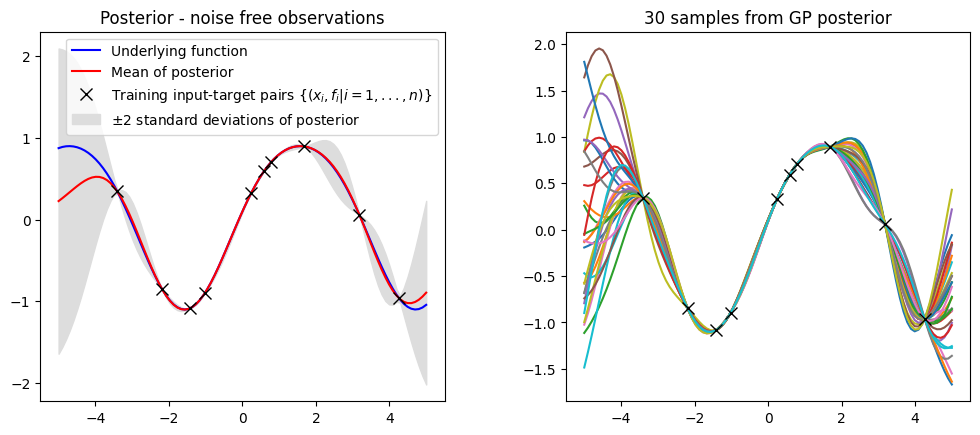

In [297]:
def plot_posterior(x_train, y_train, x_star, mu, var, num_samples=30, title="GP posterior"):
    std = np.sqrt(np.diag(var))  # square root the variance to get standard deviation
    f_post = sample(mu, var, N=num_samples)  # draw samples from posterior
    
    fig = plt.figure(figsize=(12, 12))
    plt.subplots_adjust(wspace=0.3, hspace=0.5)

    # plot underlying function, training data, posterior mean and +/- 2 standard deviations
    plt.subplot(2, 2, 1)
    plt.title(title)
    plt.fill_between(x_star.flatten(), mu.flatten()-2*std, mu.flatten()+2*std, label='$\pm$2 standard deviations of posterior', color="#dddddd")
    plt.plot(x_star, f(x_star), 'b-', label='Underlying function')
    plt.plot(x_star, mu, 'r-', label='Mean of posterior')  # plot mean of posterior
    plt.plot(x_train, y_train, 'kx', ms=8 ,label='Training input-target pairs $\{(x_i, f_i | i = 1,...,n)\}$')
    plt.legend()

    # plot samples from posterior
    plt.subplot(2, 2, 2)
    plt.title('%i samples from GP posterior' % num_samples)
    plt.plot(x_star, f_post)  # plot samples from posterior
    plt.plot(x_train, y_train, 'kx', ms=8 ,label='Training input-target pairs $\{(x_i, y_i | i = 1,...,n)\}$')
    plt.show()
Y = f(X)
plot_posterior(X, Y, x_s, mu, var, num_samples=30, title="Posterior - noise free observations")

#### Reference
https://github.com/aidanscannell/probabilistic-modelling/blob/master/notebooks/gaussian-process-regression.ipynb  
https://distill.pub/2019/visual-exploration-gaussian-processes/  
https://roger010620.medium.com/高斯過程-gaussion-process-含python實作-642965af8b2  
https://gaussianprocess.org/gpml/chapters/RW2.pdf
 